In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [9]:
df.shape

(200, 5)

In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


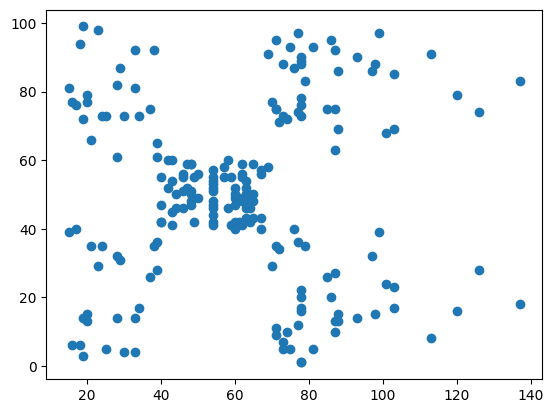

In [17]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [15]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [30]:
from sklearn.cluster import KMeans
knn=KMeans(n_clusters=5)
y=knn.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])


In [33]:
df['c']=y

In [36]:
df.c.unique()

array([1, 3, 2, 0, 4], dtype=int32)

In [45]:
df.drop(['clustser'],axis=1)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  c
0             1    Male   19                  15                      39  1
1             2    Male   21                  15                      81  3
2             3  Female   20                  16                       6  1
3             4  Female   23                  16                      77  3
4             5  Female   31                  17                      40  1
..          ...     ...  ...                 ...                     ... ..
195         196  Female   35                 120                      79  4
196         197  Female   45                 126                      28  0
197         198    Male   32                 126                      74  4
198         199    Male   32                 137                      18  0
199         200    Male   30                 137                      83  4

[200 rows x 6 columns]

In [38]:
df.head(100)

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0            1    Male   19                  15                      39   
1            2    Male   21                  15                      81   
2            3  Female   20                  16                       6   
3            4  Female   23                  16                      77   
4            5  Female   31                  17                      40   
..         ...     ...  ...                 ...                     ...   
95          96    Male   24                  60                      52   
96          97  Female   47                  60                      47   
97          98  Female   27                  60                      50   
98          99    Male   48                  61                      42   
99         100    Male   20                  61                      49   

    clustser  c  
0          1  1  
1          3  3  
2          1  1  
3          3  3  
4          1  1  
..       ... ..  
95         1  1  
96         1  1  
97         1  1  
98         1  1  
99         1  1  

[100 rows x 7 columns]

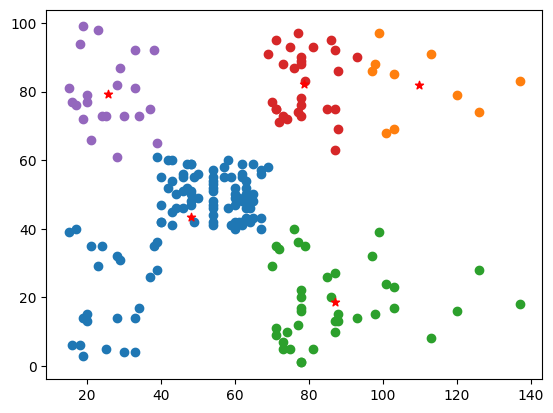

In [37]:
df1=df[df.c==1]
df2=df[df.c==0]
df3=df[df.c==2]
df4=df[df.c==3]
df0=df[df.c==4]
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'])
plt.scatter(df0['Annual Income (k$)'],df0['Spending Score (1-100)'])
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'])
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'])
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'])
plt.scatter(knn.cluster_centers_[:,0],knn.cluster_centers_[:,1],color='red',marker='*',label='centroid')
plt.show()

In [26]:
sse=[]
for i in range(1,9):
  knn=KMeans(n_clusters=i)
  knn.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  sse.append(knn.inertia_)

In [27]:
print(sse)

[269981.28000000014, 183257.8615446179, 106348.37306211119, 73679.78903948837, 44448.45544793369, 38858.959975143895, 35307.70296416016, 30354.600199800203]


In [28]:
plt.plot(range(1,9),sse)